In [2]:
%matplotlib notebook
%matplotlib notebook

import matplotlib.pyplot as plt

In [3]:
import numpy as np

In [4]:
from scipy import signal
import glob
import re
import pandas as pd
from sklearn.preprocessing import scale
from sklearn import decomposition

In [5]:
def filter_data(sensordata, fs=200, fc=5):
    sensordata_filt = np.zeros(sensordata.shape)
    
    w = fc / (fs / 2)
    b, a = signal.butter(fc,w, 'low')
    
    sensordata_filt[:,0] = signal.filtfilt(b,a, sensordata[:,0])
    sensordata_filt[:,1] = signal.filtfilt(b,a, sensordata[:,1])
    sensordata_filt[:,2] = signal.filtfilt(b,a, sensordata[:,2])
    
    return sensordata_filt

In [6]:
folders =glob.glob(r'./Data/Smartphone3/*')
# print(folders)

In [58]:

for folder in folders:
    # print(folder)
    name = re.split('/',folder)
    # print(name)
    experiment_name = name[-1]
    splitexp = re.split('_',experiment_name)
    subj=splitexp[0]
    gait=splitexp[1]
#     print(experiment_name)
    if not re.search(r'red', gait) and re.search(r'215',subj) or re.search(r'216',subj) or re.search(r'217',subj):
        # re.search(r'215',subj) or re.search(r'217',subj)
        print(subj,gait)
        gyr_file = glob.glob(folder+'/Gyroscope.csv')
        acc_file = glob.glob(folder+'/Accelerometer.csv')
        # print(gyr_file)
        # print(acc_file)
        data_gyr = pd.read_csv(gyr_file[0], sep=",")
        gyr = data_gyr.iloc[2:,1:4].values.astype(float)
        data_acc = np.loadtxt(acc_file[0], delimiter=',', skiprows=1)
        acc = data_acc[:,1:4]
        time = data_acc[:,0]
        sampling_frequency = np.round(len(time)/(time[-1]))
        filter_acc =filter_data(acc,fs=sampling_frequency,fc=4)
        filter_gyr = filter_data(gyr, fs=sampling_frequency, fc=4)
        data = scale(filter_gyr)
        pca = decomposition.PCA(n_components=1)
        pca.fit(data)
        trans = pca.transform(data)
        trans_df = pd.DataFrame(trans)

subject216 upstairs02
subject217 upstairs02
subject215 normal01
subject216 downstairs01
subject215 downstairs02
subject217 impaired01
subject216 impaired02
subject216 normal02
subject217 upstairs01
subject217 normal01
subject215 downstairs01
subject216 impaired01
subject216 upstairs01
subject215 upstairs02
subject216 normal01
subject216 downstairs02
subject217 impaired02
subject215 upstairs01
subject217 downstairs01
subject217 normal02
subject217 downstairs02
subject215 normal02


<IPython.core.display.Javascript object>


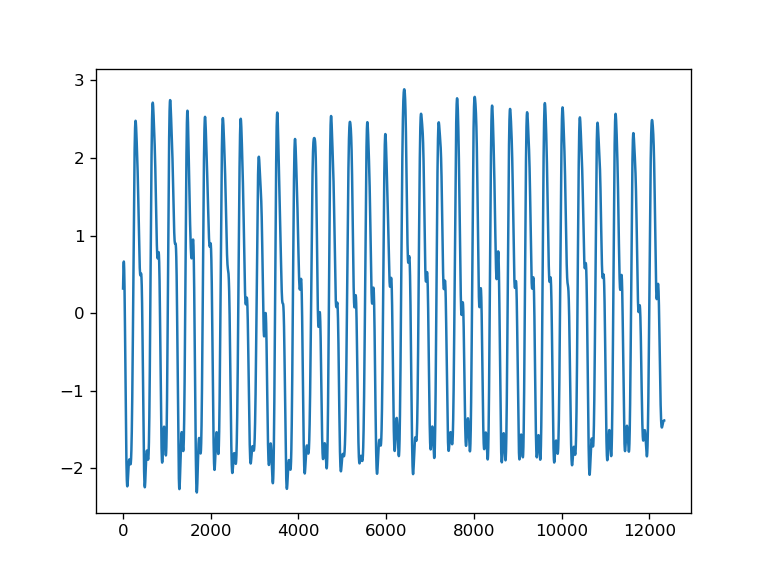

In [59]:
# plt.plot(filter_gyr[:,[0]]) #x
# plt.plot(filter_gyr[:,[1]]) #y
# plt.plot(filter_gyr[:,[2]]) #z
plt.plot(trans_df)
plt.show()

In [19]:
filter_acc =filter_data(acc,fs=sampling_frequency,fc=4)
filter_gyr = filter_data(gyr, fs=sampling_frequency, fc=4)

In [34]:
# plt.plot(gyr[:,0])
# plt.plot(filter_gyr[:,0])
# plt.show()

In [21]:
def cut_data(acc_filt, gyr_filt, freq):
    acc_abs = np.linalg.norm(acc_filt,axis=1)
    

    peaks, _ = signal.find_peaks(acc_abs,height=11, distance=freq/2)
    diff_peaks =np.diff(peaks)
    gap1  = np.argmax(diff_peaks[:20])
    gap2  = np.argmax(diff_peaks[-10:])
    gap2  = int(gap2 + np.shape(diff_peaks)-10)

    
    acc_cut = acc_filt[peaks[gap1+1]:peaks[gap2],:]
    gyr_cut = gyr_filt[peaks[gap1+1]:peaks[gap2],:]
    
    return acc_cut, gyr_cut

In [22]:
acc_cut, gyr_cut = cut_data(filter_acc,filter_gyr,sampling_frequency)

In [13]:
plt.plot(gyr_cut[:,1])
plt.plot(filter_acc[:,1])
# plt.plot(abs_acc)
plt.show()

In [25]:
data = scale(filter_gyr)
# print(data)

pca = decomposition.PCA(n_components=1)
pca.fit(data)
trans = pca.transform(data)

trans_df = pd.DataFrame(trans)
print(trans_df)

plt.plot(trans_df)
plt.show()

             0
0    -0.264019
1    -0.056475
2     0.113706
3     0.216567
4     0.233676
...        ...
1755 -0.423103
1756 -0.673521
1757 -0.929559
1758 -1.188185
1759 -1.446649

[1760 rows x 1 columns]
